# NLP With Hotel Review
<br>
<div style="text-align: right"> 
Author: Hyunjung Kim<br>
Date: August 13, 2023
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Import the data

raw_data = pd.read_csv('data/Hotel_Reviews.csv')
raw_data.head(3)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3


## EDA

In [3]:
# Unnamed are same with index so we can drop. But I will replace ia as an index.
raw_data.set_index('Unnamed: 0', inplace=True)

In [4]:
raw_data.index.name = None

In [5]:
# Get a summary of the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 

In [6]:
print(f'Our dataset has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

Our dataset has 515738 rows and 29 columns


In [7]:
non_duplicated = raw_data.duplicated().sum()

if non_duplicated==0:
    
    print('The dataset has no duplicated rows')
    
else:
    
    print('The dataset has duplicated rows')
    print(':', non_duplicated)

The dataset has duplicated rows
: 539


In [8]:
# Let's check the duplicated rows.

raw_data[raw_data.duplicated(keep = False)]

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
22083,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
22084,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
23703,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
23704,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
61875,300,9.0,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,1,7,...,0,1,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471973,311,8.3,Nothing,2,3720,Location and staff,4,20,0,718,...,0,0,0,0,0,1,0,0,1,2
489214,904,8.1,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,0,577,...,0,1,0,0,0,1,0,0,1,1
489215,904,8.1,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,0,577,...,0,1,0,0,0,1,0,0,1,1
492717,162,8.6,No Negative,0,2286,The hotel is a beautiful gallery boutique hot...,108,18,1,692,...,1,0,0,0,0,1,0,0,1,1


In [9]:
# drop the duplicated rows and set the index again.
clean_data = raw_data.drop_duplicates(ignore_index = True)

In [10]:
# Check again the number of duplicated rows.
clean_data.duplicated().sum()

0

**We had 539 duplicated rows so dropped it.**

In [11]:
# Check for missing values
print(raw_data.isnull().sum())

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

**It is data without missing values.**

In [12]:
for column in clean_data.columns:
    # Count the number of distinct values in the column
    num_distinct_values = clean_data[column].nunique()
    
    # Print the column name and the number of distinct values
    print(column)
    print(':', num_distinct_values)

Additional_Number_of_Scoring
: 480
Average_Score
: 34
Negative_Review
: 330011
Review_Total_Negative_Word_Counts
: 402
Total_Number_of_Reviews
: 1142
Positive_Review
: 412601
Review_Total_Positive_Word_Counts
: 365
Total_Number_of_Reviews_Reviewer_Has_Given
: 198
Reviewer_Score
: 2
Days_Since_Review
: 731
Latitude
: 1489
Longitude
: 1489
Day
: 31
Month
: 12
Year
: 3
Reviewer_Nationality_Australia
: 2
Reviewer_Nationality_Ireland
: 2
Reviewer_Nationality_UAE
: 2
Reviewer_Nationality_UK
: 2
Reviewer_Nationality_USA
: 2
Reviewer_Nationality_Other
: 2
Hotel_Address_Amsterdam
: 2
Hotel_Address_Barcelona
: 2
Hotel_Address_London
: 2
Hotel_Address_Milan
: 2
Hotel_Address_Paris
: 2
Hotel_Address_Vienna
: 2
Leisure_Trip
: 2
Nights_Stayed
: 31


**In order to distinguish between the binary column and the column that does not, we checked how many values we have. 13 columns are binary.**

In [13]:
binary_columns = clean_data[['Reviewer_Nationality_Australia',
                            'Reviewer_Nationality_Ireland',
                            'Reviewer_Nationality_UAE',
                            'Reviewer_Nationality_UK',
                            'Reviewer_Nationality_USA',
                            'Reviewer_Nationality_Other',
                            'Hotel_Address_Amsterdam',
                            'Hotel_Address_Barcelona',
                            'Hotel_Address_London',
                            'Hotel_Address_Milan',
                            'Hotel_Address_Paris',
                            'Hotel_Address_Vienna',
                            'Leisure_Trip'
                            ]]

In [14]:
numeric_columns = clean_data[['Total_Number_of_Reviews_Reviewer_Has_Given',
                    'Reviewer_Score',
                    'Days_Since_Review',
                    'Latitude',
                    'Longitude',
                    'Day',
                    'Month',
                    'Year',
                    'Nights_Stayed']]

In [15]:
# Descriptive statistics
numeric_columns.describe()

,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Nights_Stayed
count,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.00000,515199.000000
mean,7.164750,0.570100,354.402120,49.433012,2.893915,15.680589,6.486043,2016.12092,2.361750
std,11.039315,0.495062,208.909135,3.461933,4.669672,8.864227,3.351916,0.68751,1.646734
min,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.00000,1.000000
25%,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.00000,1.000000
50%,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.00000,2.000000
75%,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.00000,3.000000
max,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.00000,31.000000


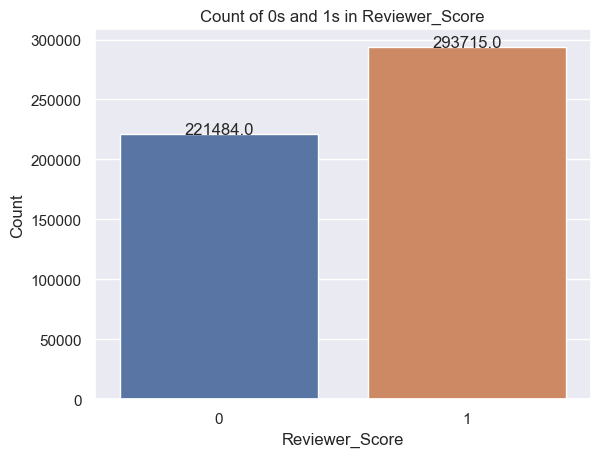

In [16]:
ax = sns.countplot(data=clean_data, x='Reviewer_Score')
plt.title('Count of 0s and 1s in Reviewer_Score')
plt.xlabel('Reviewer_Score')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)

plt.show()

**Reviewer_Score is our target. 1 represents a positive review, and 0 represents a negative review. When we plot a bar chart to visualize the data ratios, we can see that we have 221,484 negative reviews and 293,715 positive reviews.**

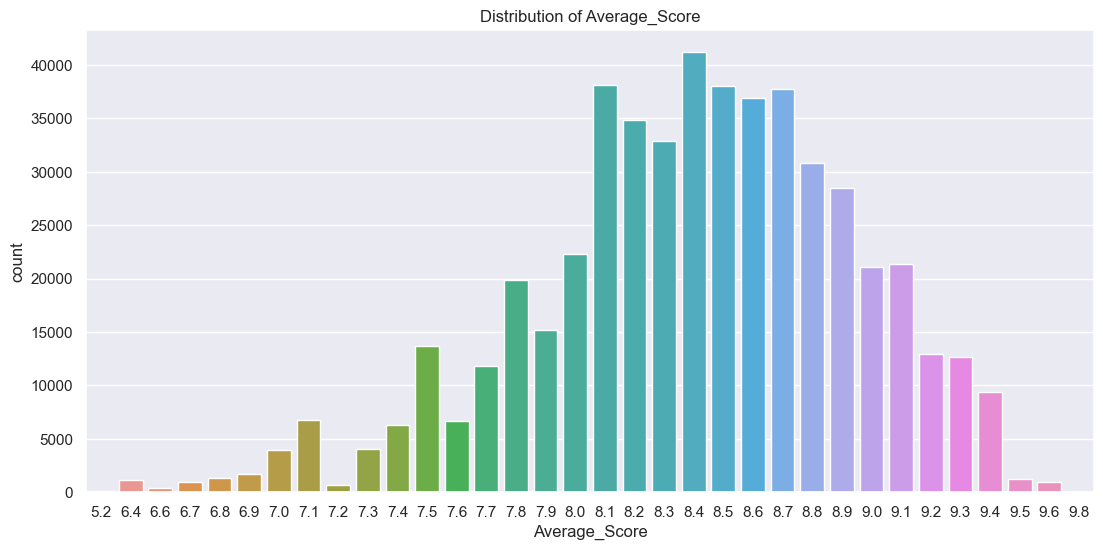

In [17]:
plt.figure(figsize=(13, 6))
sns.countplot(data=raw_data, x='Average_Score')
plt.title('Distribution of Average_Score')
plt.show()

**Most of the scores are concentrated at 8.1 to 8.9.**

In [18]:
numeric_columns.corr() 

,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Nights_Stayed
Total_Number_of_Reviews_Reviewer_Has_Given,1.000000,-0.013274,0.035128,-0.059757,0.112014,-0.001743,0.013483,-0.034632,-0.008950
Reviewer_Score,-0.013274,1.000000,-0.002455,-0.032239,0.027934,0.002158,-0.027280,0.013019,-0.015212
Days_Since_Review,0.035128,-0.002455,1.000000,0.000140,0.000661,-0.007985,0.210951,-0.917242,0.002142
Latitude,-0.059757,-0.032239,0.000140,1.000000,-0.302580,-0.008506,-0.023649,0.009706,-0.172808
Longitude,0.112014,0.027934,0.000661,-0.302580,1.000000,0.006321,0.024940,-0.010856,0.108048
Day,-0.001743,0.002158,-0.007985,-0.008506,0.006321,1.000000,-0.008764,-0.025030,0.001544
Month,0.013483,-0.027280,0.210951,-0.023649,0.024940,-0.008764,1.000000,-0.581326,0.022867
Year,-0.034632,0.013019,-0.917242,0.009706,-0.010856,-0.025030,-0.581326,1.000000,-0.011072
Nights_Stayed,-0.008950,-0.015212,0.002142,-0.172808,0.108048,0.001544,0.022867,-0.011072,1.000000


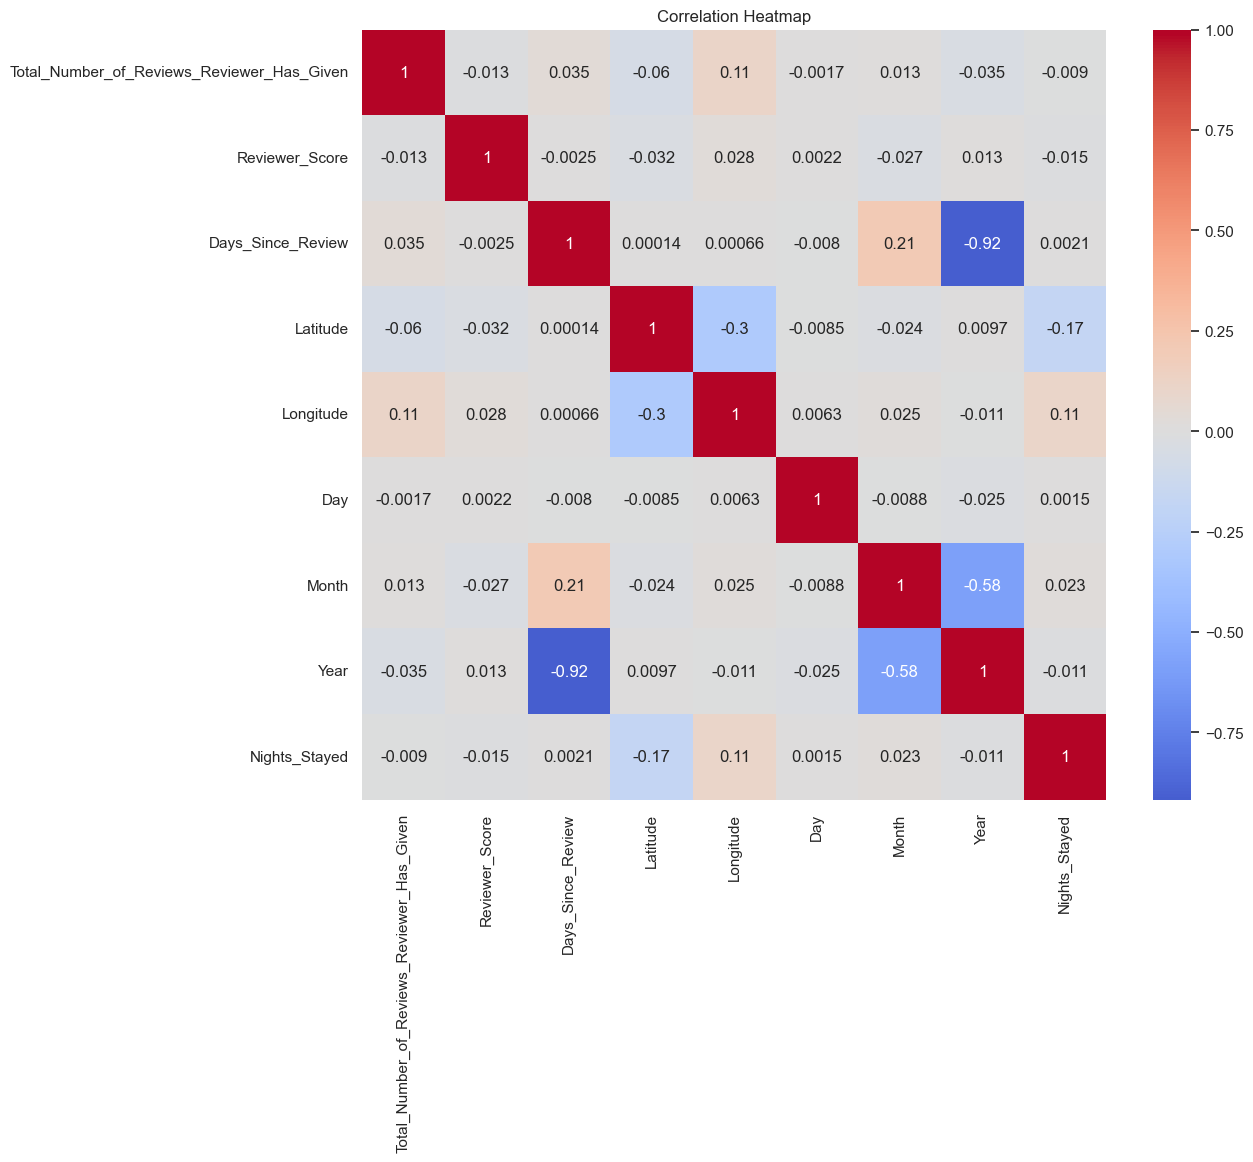

In [19]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

**The correlation between variables was examined. Although 'Year' and 'Days_Since_Review' were highly correlated, I will keep both. This is because the year has only three values, and the year and 'Days_Since_Review' are meaningful values, respectively.**

In [20]:
# binary_columns contain binary numbers. 
# As we use sum(), we can know the count of each columns. 
binary_columns.sum()

Reviewer_Nationality_Australia     21648
Reviewer_Nationality_Ireland       14814
Reviewer_Nationality_UAE           10228
Reviewer_Nationality_UK           245107
Reviewer_Nationality_USA           35349
Reviewer_Nationality_Other        188053
Hotel_Address_Amsterdam            57209
Hotel_Address_Barcelona            60148
Hotel_Address_London              262293
Hotel_Address_Milan                37202
Hotel_Address_Paris                59412
Hotel_Address_Vienna               38935
Leisure_Trip                      417347
dtype: int64

In [21]:
# As we use sum(), we can know the count of each columns. 
binary_columns.sum()/binary_columns.count()*100

Reviewer_Nationality_Australia     4.201872
Reviewer_Nationality_Ireland       2.875394
Reviewer_Nationality_UAE           1.985252
Reviewer_Nationality_UK           47.575209
Reviewer_Nationality_USA           6.861232
Reviewer_Nationality_Other        36.501041
Hotel_Address_Amsterdam           11.104253
Hotel_Address_Barcelona           11.674712
Hotel_Address_London              50.911007
Hotel_Address_Milan                7.220899
Hotel_Address_Paris               11.531855
Hotel_Address_Vienna               7.557274
Leisure_Trip                      81.006951
dtype: float64

**81% of people traveled for leisure. The majority of reviews, 47.57%, were submitted by individuals from the United Kingdom, followed by 36.50% from people of 'Other' nationalities.**

**Furthermore, approximately 50.91% of travelers stayed in hotels located in the United Kingdom. Barcelona, Amsterdam, and Paris had similar proportions of guests, around 11%.**

## Preprocessing

In [22]:
clean_data

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515194,168,8.1,no trolly or staff to help you take the lugga...,14,2823,location,2,8,0,704,...,0,1,0,0,0,0,0,1,1,5
515195,168,8.1,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,0,712,...,0,1,0,0,0,0,0,1,1,2
515196,168,8.1,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,0,715,...,0,1,0,0,0,0,0,1,1,4
515197,168,8.1,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,1,717,...,0,1,0,0,0,0,0,1,1,3


In [23]:
review_data = clean_data[['Average_Score', 'Negative_Review', 'Positive_Review', 'Reviewer_Score']]

In [24]:
review_data

,Average_Score,Negative_Review,Positive_Review,Reviewer_Score
0,7.7,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,0
1,7.7,No Negative,No real complaints the hotel was great great ...,0
2,7.7,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,0
3,7.7,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,0
4,7.7,You When I booked with your company on line y...,Amazing location and building Romantic setting,0
...,...,...,...,...
515194,8.1,no trolly or staff to help you take the lugga...,location,0
515195,8.1,The hotel looks like 3 but surely not 4,Breakfast was ok and we got earlier check in,0
515196,8.1,The ac was useless It was a hot week in vienn...,No Positive,0
515197,8.1,No Negative,The rooms are enormous and really comfortable...,1


### The Bag-of-Words model

Firstly, We will start with simple corpus.

In [25]:
review1 = 'This was absolutely the best hotel I have ever stayed, not sure it can ever be beaten'
review2 = 'This was absolutely not the best hotel I have ever stayed, sure it can be beaten'
review3 = 'This was absolutely the best hotel I have ever stayed'

small_reviews = pd.DataFrame({"Review": [review1, review2, review3]})
small_reviews

,Review
0,This was absolutely the best hotel I have ever...
1,This was absolutely not the best hotel I have ...
2,This was absolutely the best hotel I have ever...


Tokenizing the reviews

In [26]:
small_reviews['Review'].str.split(' ')

0    [This, was, absolutely, the, best, hotel, I, h...
1    [This, was, absolutely, not, the, best, hotel,...
2    [This, was, absolutely, the, best, hotel, I, h...
Name: Review, dtype: object

To make the document-term matrix we need the bag of words model. We will use CountVectorizer().

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(small_reviews["Review"])

# 3. Transform
small_transformed = bagofwords.transform(small_reviews["Review"])
small_transformed

<3x15 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [29]:
bagofwords.get_feature_names_out()

array(['absolutely', 'be', 'beaten', 'best', 'can', 'ever', 'have',
       'hotel', 'it', 'not', 'stayed', 'sure', 'the', 'this', 'was'],
      dtype=object)

In [30]:
small_transformed.toarray()

array([[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]])

In [31]:
my_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=small_transformed.toarray())
display(my_df)

,absolutely,be,beaten,best,can,ever,have,hotel,it,not,stayed,sure,the,this,was
0,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0,0,1,0,1,1,1,0,0,1,0,1,1,1


Now we will apply it on real data. This process will be done on the positive and negative review columns separately.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
neg_data = review_data[['Negative_Review', 'Reviewer_Score']]
pos_data = review_data[['Positive_Review', 'Reviewer_Score']]

**We will analyze text data on positive reviews.**

In [34]:
X_pos = pos_data['Positive_Review']
y_pos = pos_data['Reviewer_Score']

In [35]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.33, random_state=42)

In [36]:
# size of training data
X_train_pos.shape

(345183,)

In [37]:
# 1. Instantiate
bagofwords_pos = CountVectorizer(stop_words="english", max_features=500, min_df=10)

# 2. Fit
bagofwords_pos.fit(X_train_pos)

# 3. Transform
X_train_transformed_pos = bagofwords_pos.transform(X_train_pos)
X_train_transformed_pos

<345183x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2322145 stored elements in Compressed Sparse Row format>

Before use stop_words, wee can see that the sparse matrix has 345,183 rows and 41,523 columns. This means that there are 41,523 unique terms or tokens. However, after apply stop_words the columns change to 42,220.

Moreover, we give parameter 'max_features=500'. This means that there are 500 unique terms or tokens.

To transform our test data we will use the bag of words vectorizer fitted from our train data.

In [38]:
X_test_transformed_pos = bagofwords_pos.transform(X_test_pos)
X_test_transformed_pos

<170016x500 sparse matrix of type '<class 'numpy.int64'>'
	with 1145401 stored elements in Compressed Sparse Row format>

In [39]:
words_pos = bagofwords_pos.get_feature_names_out()
some_indices = range(1, 500, round(500/10)) 

samples_pos = [words_pos[i] for i in some_indices]
print(samples_pos)

['15', 'bit', 'conditioning', 'entrance', 'happy', 'long', 'old', 'reasonable', 'spot', 'town']


In [40]:
some_indices

range(1, 500, 50)

We can see how many times a token appeared in our overall corpus

In [41]:
counts_pos = np.array(X_train_transformed_pos[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts_pos[0]}, index=samples_pos).T)

,15,bit,conditioning,entrance,happy,long,old,reasonable,spot,town
total_corpus_count,2004,2697,1014,860,2682,1420,2758,1585,813,1560


In [42]:
len(bagofwords.get_feature_names_out())

15

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Fitting a model
logreg_pos = LogisticRegression(C = 0.1)
logreg_pos.fit(X_train_transformed_pos, y_train_pos)

# Training and test score
print(f"Train score: {logreg_pos.score(X_train_transformed_pos, y_train_pos)}")
print(f"Test score: {logreg_pos.score(X_test_transformed_pos, y_test_pos)}")

Train score: 0.6969404634643074
Test score: 0.6955757105213627


In [45]:
logreg_pos.coef_[0].shape

(500,)

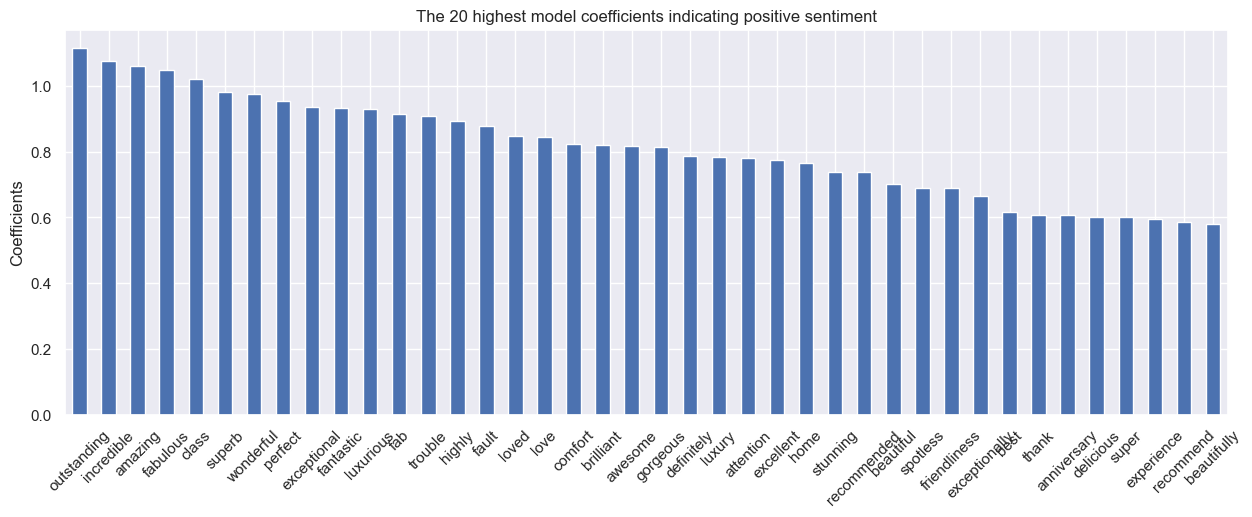

In [46]:
word_counts_pos = pd.DataFrame(
    {"coefficients": logreg_pos.coef_[0]},
    index=bagofwords_pos.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts_pos.head(40).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

**A chart showing the top 20 words from our positive data.**

In [47]:
word_counts_pos.head(20)

,coefficients
outstanding,1.114794
incredible,1.075104
amazing,1.060247
fabulous,1.049410
class,1.021098
superb,0.981105
wonderful,0.975864
perfect,0.955431
exceptional,0.934331
fantastic,0.933470


**Now, we will analyze text data on negative reviews.**

In [48]:
X_neg = neg_data['Negative_Review']
y_neg = neg_data['Reviewer_Score']

In [49]:
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.33, random_state=42)

In [50]:
X_train_neg.shape

(345183,)

In [51]:
# 1. Instantiate
bagofwords_neg = CountVectorizer(stop_words="english", max_features=500, min_df=10)

# 2. Fit
bagofwords_neg.fit(X_train_neg)

# 3. Transform
X_train_transformed_neg = bagofwords_neg.transform(X_train_neg)
X_train_transformed_neg

<345183x500 sparse matrix of type '<class 'numpy.int64'>'
	with 1713739 stored elements in Compressed Sparse Row format>

we can see that the sparse matrix has 345,183 rows and 500 columns. This means that there are 500 unique terms or tokens.

In [52]:
X_test_transformed_neg = bagofwords_neg.transform(X_test_neg)
X_test_transformed_neg

<170016x500 sparse matrix of type '<class 'numpy.int64'>'
	with 841351 stored elements in Compressed Sparse Row format>

In [53]:
words = bagofwords_neg.get_feature_names_out()
some_indices_neg = range(1, 500, round(500/10))

samples = [words[i] for i in some_indices_neg]
print(samples)

['10', 'buffet', 'cooked', 'evening', 'help', 'location', 'nights', 'provided', 'smell', 'try']


In [54]:
counts_neg = np.array(X_train_transformed_neg[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count_neg": counts_neg[0]}, index=samples).T)

,10,buffet,cooked,evening,help,location,nights,provided,smell,try
total_corpus_count_neg,3439,1891,1266,2699,2345,7346,2851,2029,3318,1050


In [55]:
len(bagofwords_neg.get_feature_names_out())

500

In [56]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed_neg, y_train_neg)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed_neg, y_train_neg)}")
print(f"Test score: {logreg.score(X_test_transformed_neg, y_test_neg)}")

Train score: 0.7358299800395732
Test score: 0.7359836721249765


/Users/jaysworld/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
logreg.coef_[0].shape

(500,)

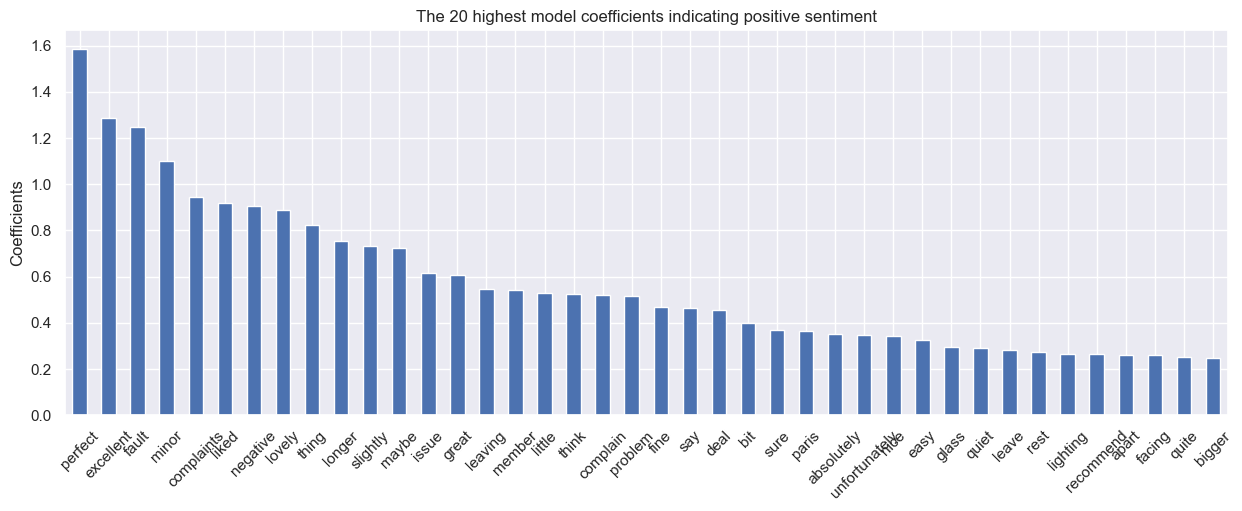

In [58]:
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords_neg.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(40).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [59]:
word_counts.head(20)

,coefficients
perfect,1.586949
excellent,1.286730
fault,1.245794
minor,1.102320
complaints,0.942890
liked,0.920695
negative,0.906761
lovely,0.889899
thing,0.824492
longer,0.755477


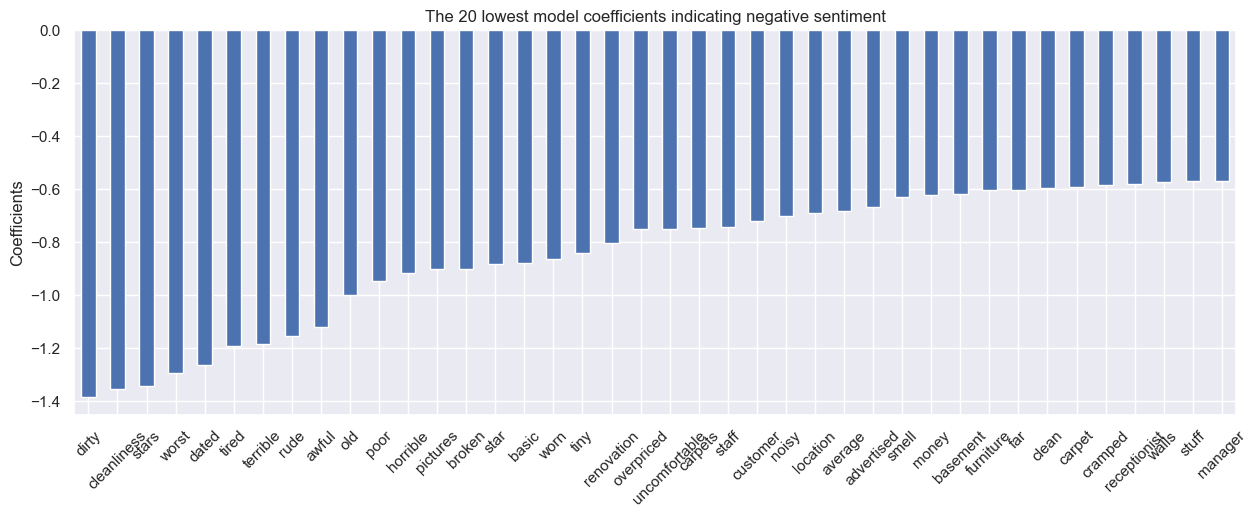

In [60]:
word_counts.sort_values("coefficients", ascending=True).head(40).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [61]:
word_counts.tail(20)

,coefficients
overpriced,-0.750311
renovation,-0.803123
tiny,-0.839284
worn,-0.864823
basic,-0.877594
star,-0.880339
broken,-0.899713
pictures,-0.902315
horrible,-0.915898
poor,-0.945232


**It's the 20 most common words in negative reviews. Having a good word even though it's a negative review is presumed to have used a cushion word before they wrote down a negative review.**

## Decision Tree Classfier

we will make a decision tree using pipeline. 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Only numeric variables can be used in the decision tree. We will change the data we have into numerical form. Moreover we will use some features we need.**

In [63]:
decision_data = clean_data[['Average_Score',                               
            'Reviewer_Score',                                
            'Days_Since_Review',                                                              
            'Day',                                           
            'Month',                                         
            'Year',                                          
            'Reviewer_Nationality_Australia',                
            'Reviewer_Nationality_Ireland',                  
            'Reviewer_Nationality_UAE',                      
            'Reviewer_Nationality_UK',                       
            'Reviewer_Nationality_USA',                      
            'Reviewer_Nationality_Other',                    
            'Hotel_Address_Amsterdam',                       
            'Hotel_Address_Barcelona',                       
            'Hotel_Address_London',                          
            'Hotel_Address_Milan',                           
            'Hotel_Address_Paris',                           
            'Hotel_Address_Vienna',                          
            'Leisure_Trip',                                  
            'Nights_Stayed']]

In [64]:
X = decision_data.drop('Reviewer_Score', axis=1)
y = decision_data['Reviewer_Score']

In [65]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

# Fit the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

In [67]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.44      0.52     44084
           1       0.66      0.81      0.73     58956

    accuracy                           0.65    103040
   macro avg       0.64      0.62      0.62    103040
weighted avg       0.65      0.65      0.64    103040



In [68]:
dt.get_depth()

5

In [69]:
from sklearn.tree import plot_tree

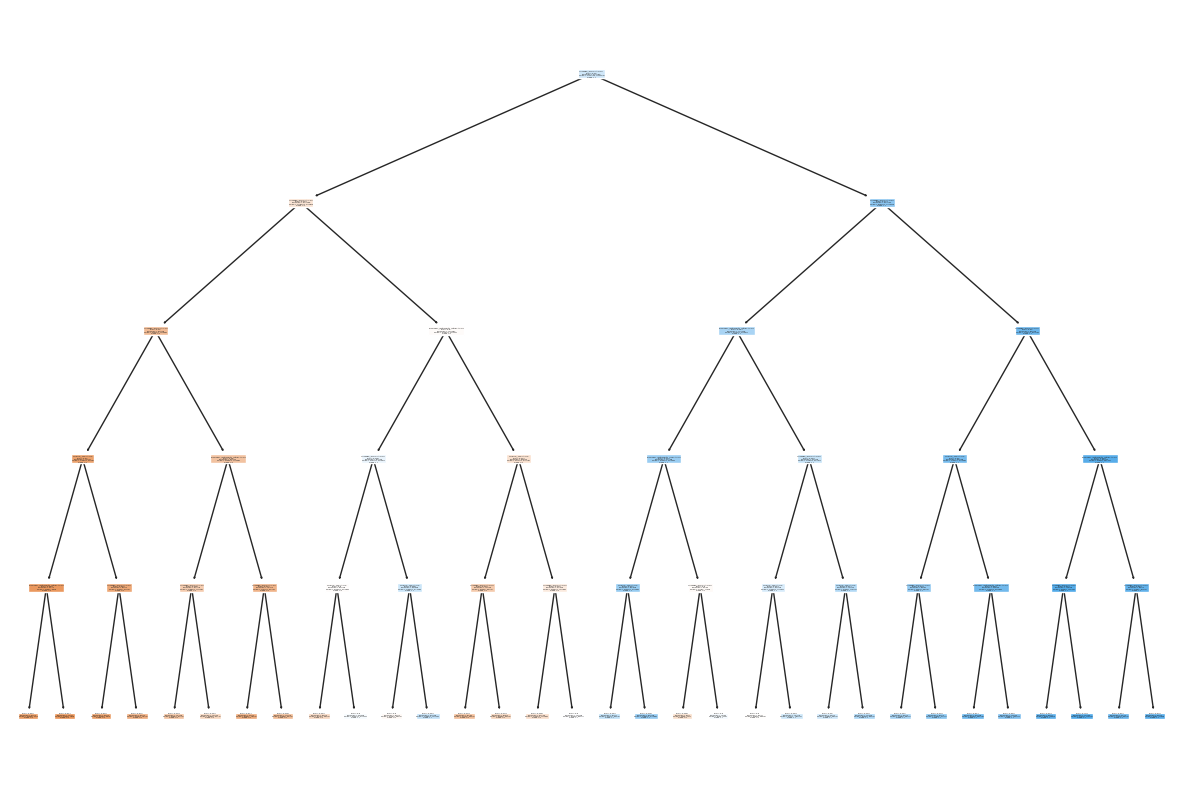

In [70]:
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

**Now we will use pipeline**

In [71]:
from sklearn import svm

In [72]:
X = decision_data.drop('Reviewer_Score', axis=1)
y = decision_data['Reviewer_Score']

In [73]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Pipeline

estimators = [
    ('scaler',StandardScaler()),
    ('PCA', PCA(n_components=4)),
    ('model', DecisionTreeClassifier())
]

my_pipe = Pipeline(estimators)

param_grid = {
    'model': [DecisionTreeClassifier()],
    'model__max_depth': [1, 5, 12]
}

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
avg_val_score = np.mean(cross_val_score(my_pipe, X_train, y_train, cv=5))
avg_val_score

0.5661407369619356

In [ ]:
grid = GridSearchCV(my_pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train, y_train)

In [ ]:
best = fittedgrid.best_estimator_

In [ ]:
# Best hyperparameters
fittedgrid.best_params_

In [ ]:
# Mean test score for each CV fold
fittedgrid.cv_results_['mean_test_score']

In [ ]:
accuracy = best.score(X_test, y_test)
print("Test Accuracy:", accuracy)